# Questions asked : 
## Does receiving SMS w.r.t age categories affect showing up to appointment?
## How does day difference affect showing up to appointments?
## What is the preferred time for men and women to show up for the appointment?
## is showing up for appointment correspond with specific week day?


In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## reading the csv file
df = pd. read_csv(r'D:\Data Analysis\Tasks\Professional Track\2nd_project\Data\noshowappointments-kagglev2-may-2016.csv')

## Renaming columns

In [3]:
## Renaming columns
df.rename(columns={'PatientId':'patient_id', 'AppointmentID':'appointment_id', 'Gender':'gender', 
                   'ScheduledDay':'scheduled_day','AppointmentDay':'appointment_day',
                   'Age':'age', 'Neighbourhood':'neighbourhood', 'Scholarship':'scholarship',
                   'Hipertension':'hipertension','Diabetes':'diabetes','Alcoholism':'alcoholism',
                   'Handcap':'handcap', 'SMS_received':'sms_received', 'No-show':'no_show'}, inplace =True)

In [4]:
### Cleaning data and removing outliers
a = [-1,115]
df_2 = df[df.age.isin(a)]
df.drop(index=[63915,68127,76284,97666,99832,63912],inplace = True)


## Extracting date and time data

In [5]:
### Extracting time and date
import datetime

df['scheduled_day']  = pd.to_datetime(df['scheduled_day'], 
                                       format='%Y-%m-%d %H:%M')
df['appointment_day']  = pd.to_datetime(df['appointment_day'], 
                                       format='%Y-%m-%d %H:%M')
### Scheduling data
df['scheduled_year']= df['scheduled_day'].dt.year
df['scheduled_month']= df['scheduled_day'].dt.month
df['scheduled_d']= df['scheduled_day'].dt.day
df['scheduled_hour']= df['scheduled_day'].dt.hour
### Appoitment
df['appointment_year']= df['appointment_day'].dt.year
df['appointment_month']= df['appointment_day'].dt.month
df['appointment_d']= df['appointment_day'].dt.day
### Creating week day column
df['day_of_week_a'] = df['appointment_day'].dt.day_name()
df['day_of_week_s'] = df['scheduled_day'].dt.day_name()

## Categorize Age into child(0,14) ,youth(15,24) ,adult(25,64) and senior(64 and over)

In [6]:
### categorizing age
cut_bins = [0,14,24,64,102]

df['age_cat'] = pd.cut(df['age'],bins = cut_bins , labels = ['child','youth','adult','senior'])

In [7]:
df.head(5)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,...,scheduled_year,scheduled_month,scheduled_d,scheduled_hour,appointment_year,appointment_month,appointment_d,day_of_week_a,day_of_week_s,age_cat
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,2016,4,29,18,2016,4,29,Friday,Friday,adult
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,2016,4,29,16,2016,4,29,Friday,Friday,adult
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,2016,4,29,16,2016,4,29,Friday,Friday,adult
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,2016,4,29,17,2016,4,29,Friday,Friday,child
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,2016,4,29,16,2016,4,29,Friday,Friday,adult


In [18]:
df.shape
38687/110521

(110521, 24)

## Split the data to Females and Males

In [8]:
### splitting data to males and females
df_m = df.query('gender == "M"')
df_f = df.query('gender == "F"')

In [9]:
df['appointment_month'].value_counts()

5    80837
6    26449
4     3235
Name: appointment_month, dtype: int64

In [10]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show', 'scheduled_year', 'scheduled_month', 'scheduled_d',
       'scheduled_hour', 'appointment_year', 'appointment_month',
       'appointment_d', 'day_of_week_a', 'day_of_week_s', 'age_cat'],
      dtype='object')

## Data Info

''

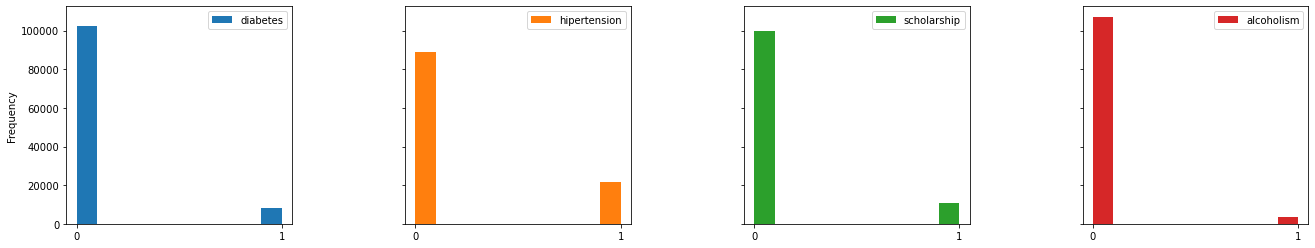

In [11]:
df_2 = df.loc[:,['diabetes','hipertension','scholarship','alcoholism']]
df_2.plot.hist(subplots=True,layout =(1,4),sharex =True,sharey=True)
plt.subplots_adjust(right = 3 ,wspace = 0.5)
plt.xticks([0,1])
;

### Bar plot function

In [12]:
### Bar plotting function 
def plot_func(y,color,ylab,title):
    plt.bar(y.index,y.values, color ='{}'.format(color))
    plt.ylabel('{}'.format(ylab))
    plt.title('{}'.format(title))

## Bar sup plotting function

In [13]:
### function for subplotting

def bar_plot(row,col,to_plot,colors,titles,ytitles):
    
    fig, axes = plt.subplots(nrows= row, ncols= col, sharex =True , sharey=True )

    axes =axes.flatten()

    for i,ax in enumerate(axes):

        ax.bar(to_plot[i].index,height = to_plot[i].values ,color = colors[i]) ### Plotting
        ax.set_title(titles[i])        ### set title
        ax.set_ylabel(ytitles[i])      ##set y lable
        fig.tight_layout();

# Question 1
## What is the relation between SMS , Age categoreies and showing to appoitment?

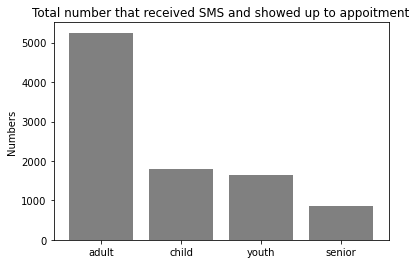

In [14]:
### showing how many received the SMS and showed up to appoitment
color = 'grey'
ylab = 'Numbers'
title = 'Total number that received SMS and showed up to appoitment'
y_2 = df.query('no_show == "Yes" & sms_received >=1 ')['age_cat'].value_counts()
plot_func(y_2,color,ylab,title);


In [15]:
### Sending SMS to youth(15,24) makes him more likely to attend than an adult
ylab = 'Percentage'
title = 'Percentage of total number that received SMS and the ones that showed up to appoitment'
y_3 = y_2/y_1
plot_func(y_3,'green',ylab,title);



NameError: name 'y_1' is not defined

In [ ]:
### Males who received SMS and showed at the appoitment
x_m_r = df_m.query('no_show == "Yes" & sms_received >=1 ')['age_cat'].value_counts()
### Females who received SMS and showed at the appoitment
x_f_r = df_f.query('no_show == "Yes" & sms_received >=1 ')['age_cat'].value_counts()
### number of males and females who recived SMSs
x_m = df_m.query(' sms_received >=1 ')['age_cat'].value_counts()
x_f = df_f.query(' sms_received >=1 ')['age_cat'].value_counts()
### Percentage of F and M
ff = x_f_r/x_f
mm = x_m_r/x_m
####

l1 = [ mm ,ff]
colors = ['darkcyan','maroon']
ylabs = ['Percentage','Percentage']
titles = ['Percentage of men showed after receiving SMS','Percentage of women showed after receiving SMS']
for i in range(2):
    plot_func(l1[i],colors[i],ylabs[i],titles[i])
    plt.show();

## Relation between SMS , Age categoreies,Gender and showing to appoitment

In [ ]:
### Males who received SMS and showed at the appoitment
x_m_r = df_m.query('no_show == "Yes" & sms_received >=1 ')['age_cat'].value_counts()
### Females who received SMS and showed at the appoitment
x_f_r = df_f.query('no_show == "Yes" & sms_received >=1 ')['age_cat'].value_counts()

### Plotting the two graphs side by side

colors = ['darkcyan','maroon']
to_plot = [x_m_r,x_f_r]
titles = ['Men showed & received SMS','Women showed & received SMS']
ytitles = ['Number','Number']
bar_plot(1,2,to_plot,colors,titles,ytitles)


In [ ]:
### number of males and females who recived SMSs

x_m = df_m.query(' sms_received >=1 ')['age_cat'].value_counts()
x_f = df_f.query(' sms_received >=1 ')['age_cat'].value_counts()

ff = x_f_r/x_f
mm = x_m_r/x_m

### plotting the percentage of males and femlaes who showed up to appoitment from the total males and females who received SMSs
### Again youth(15,24) are likely to attend 

colors = ['g','grey']
to_plot = [mm,ff]
titles = ['Men showed & received SMS','Women showed & received SMS']
ytitles = ['Percentage','Percentage']
bar_plot(1,2,to_plot,colors,titles,ytitles)
###


## Calculating the diffrence between the scheduled and appoitment days 

In [ ]:
df['day_diff'] = df['appointment_day'].dt.date - df['scheduled_day'].dt.date
### removing days string from the data 
df['day_diff'] = df['day_diff'].dt.components.days

# Question 2
## How does day diffrence between scheduling and appoitment  affect showing to an appoitment ?

In [ ]:
### query by showing up recieving sms 
cc = dict(df.query('no_show == "Yes" & sms_received >=1 & day_diff >=0')['day_diff'].value_counts())
keys_y = cc.keys()
values_y = cc.values()
ll = dict(df.query('no_show == "No" & sms_received >=1 & day_diff >=0')['day_diff'].value_counts())
keys_n = ll.keys()
values_n = ll.values()
### plotting the day diff

fig, (ax1,ax2) = plt.subplots(2, figsize=(10, 6))

ax1.scatter(x = list(keys_y) , y = list(values_y))
ax1.set_xlabel("Day diffrence")
ax1.set_ylabel("people recived SMS and showed up")

ax2.scatter(x =list(keys_n), y = list(values_n))
ax2.set_xlabel("Day diffrence")
ax2.set_ylabel("people recived SMS and didnt show up ");
plt.suptitle('day diffrence between scheduling and appoitment  affect showing to an appoitmen4t',fontsize=18)
fig.tight_layout()
### Delaying the appoitment day reduce the problity of people showing up to appoitment

# Question 3
## Do men or women prefer specific time to manke an appoitmen ?

In [ ]:
###analysis
x_1 = df_m.query('no_show == "Yes" ')['scheduled_hour'].value_counts()
y_1 = df_f.query('no_show == "Yes" ')['scheduled_hour'].value_counts()

### Plotting

colors = ['g','maroon']
to_plot = [x_1,y_1]
titles = ['men shows in specific hours','women shows in specific hours']
ytitles = ['Number','Number']
bar_plot(2,1,to_plot,colors,titles,ytitles)
plt.xticks([*range(6,22,1)])
;

###  	Men and women generally prefer early appointments( 7 am to 10 am).

# Question 4
## Do people prefer specific week day ?

In [ ]:
x_3 = df_m.query('no_show == "Yes"')['day_of_week_a'].value_counts()
y_3 = df_f.query('no_show == "Yes"')['day_of_week_a'].value_counts()

###
colors = ['g','grey']
to_plot = [x_3,y_3]
titles = ['men shows in specific week day','women shows in specific week day']
ytitles = ['Number','Number']
bar_plot(2,1,to_plot,colors,titles,ytitles)


### Most peapole like to go to appoitments on Tuesday


In [ ]:
### Saving changes to excel file
##df.to_csv(r'D:\Data Analysis\Tasks\Professional Track\2nd_project\Data\noshowappointmentsV3.csv', index = False)